# Problemas durante a realização da atividade

### Normalização:
Durante o desenvolvimento da regressão linear eu tive alguns problemas ate chegar ao resultado final um deles foi a tentativa de realizar o treinamento sem a utilização da normalização onde os numeros ficavam tão grandes que dava overflow sendo possivel a realização do treinamento apenas apos a normalização.

### Taxa de aprendizado
Tive problema tambem com o valor da taxa de aprendizado onde antes eu estava usando `0.0001` e a regressão ficava com um `MSE de 3.6` sendo que se eu chutasse apenas na media eu teria `1.5` então basicamente ele estava ainda pior que isso então depois de muito tempo refatorando codigo lembrei da taxa de aprendizado e mudei para `0.001` gerando um resultado assim no final de `0.8 de MSE`.

In [117]:
!pip install --upgrade pip
!pip install pandas numpy scikit-learn matplotlib

In [118]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [119]:
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseVal")

In [120]:
X = np.asarray(X)
y = np.asarray(y)

m_total = X.shape[0]

train_tam = int(0.8 * m_total)

X_train = X[:train_tam]
y_train = y[:train_tam]

X_teste  = X[train_tam:]
y_teste  = y[train_tam:]

In [121]:
medias = X_train.mean(axis=0)
desvios = X_train.std(axis=0)
desvios[desvios == 0] = 1.0

X_train = (X_train - medias) / desvios
X_teste = (X_teste  - medias) / desvios

X = X_train
y = y_train

In [122]:
m, n = X.shape
a = 0.001
e = 1000

w = [0.0] * n
b = 0

In [ ]:
def treino():
  global w, b

  y_pred = [0.0] * m
  for i in range(m):
      for j in range(n):
          y_pred[i] = y_pred[i] + w[j] * X[i][j]
      y_pred[i] = y_pred[i] + b

  erro = [0.0] * m
  for i in range(m):
      erro[i] = y_pred[i] - y[i]

  grad_w = [0.0] * n
  for j in range(n):
      soma = 0.0
      for i in range(m):
          soma = soma + erro[i] * X[i][j]

      grad_w[j] = (2/m) * soma

  grad_b = (2/m) * sum(erro)
  
  for j in range(n):
      w[j] = w[j] - a * grad_w[j]
  
  b = b - a * grad_b

In [124]:
def previsao(m_teste):
  y_pred_teste = [0.0] * m_teste

  for i in range(m_teste):
    soma = 0.0

    for j in range(n):
      soma = soma + w[j] * X_teste[i][j]
    
    y_pred_teste[i] = soma + b
  
  return y_pred_teste

In [125]:
def calculo_mse(y_real, y_pred, m_teste):
  soma = 0.0

  for i in range(m_teste):
    dif = y_real[i] - y_pred[i]
    soma = soma + dif * dif
  
  mse = soma / m_teste
  return mse

In [126]:
for epoch in range(e):
    treino()

In [ ]:
m_teste = len(X_teste)

y_pred = previsao(m_teste)
teste_mse = calculo_mse(y_teste, y_pred, m_teste)

print(teste_mse)

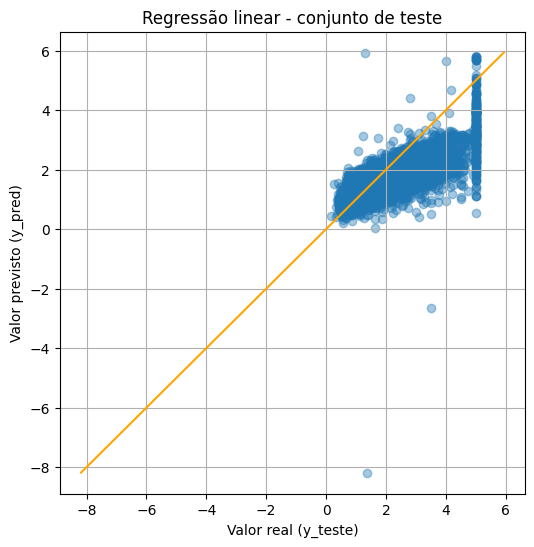

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(y_teste, y_pred, alpha=0.4)

min_val = min(min(y_teste), min(y_pred))
max_val = max(max(y_teste), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="orange")

plt.xlabel("Valor real (y_teste)")
plt.ylabel("Valor previsto (y_pred)")
plt.title("Regressão linear")
plt.grid(True)

plt.show()

# Referencias

- https://medium.com/@shuklapratik22/linear-regression-with-gradient-descent-from-scratch-d03dfa90d04c
- https://medium.com/@SejallB/multiple-linear-regression-from-scratch-with-gradient-descent-beginners-guide-c00fc4783f80
- https://towardsdatascience.com/implementing-linear-regression-with-gradient-descent-from-scratch-f6d088ec1219/#:~:text=Note:%20The%20step%20size%20is,b=bias;%20X=features